In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../train_data/TrainingOriginal.csv')
len(data)

2331

In [5]:
data.head()

,Unnamed: 0,APOGEE_ID,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,G,...,age_68l,ageErr,logAge,logAgeErr,distKpc,distKpc_68u,distKpc_68l,distErrKpc,logDistKpc,logDistKpcErr
0,1867,2M19371027+3833366,2052170902004055424,2.595899,4859.090820,-0.022834,0.171807,-0.167251,0.412339,11.764113,...,1.4760,0.10120,0.209676,0.027905,1.502098,1.515262,1.490219,0.012522,0.176698,0.003619
1,2163,2M19424586+4744370,2080647604626475776,2.966436,4704.287109,-0.002465,0.367972,-0.028808,0.403981,12.895377,...,7.3282,2.14160,0.965789,0.099944,1.364082,1.385117,1.343136,0.020990,0.134841,0.006683
2,2535,2M19492609+4352210,2078861001311174272,2.585862,4988.357422,0.010741,-0.025190,-0.238046,0.409674,11.281590,...,1.1537,0.05965,0.088915,0.021368,1.222420,1.232599,1.211992,0.010303,0.087221,0.003661
3,897,2M19155325+4749366,2130919470971121536,2.770921,4813.821289,0.026832,-0.273174,-0.107823,0.244127,12.181296,...,5.0165,1.60350,0.813154,0.107328,1.437957,1.461475,1.414165,0.023655,0.157746,0.007146
4,1259,2M19241817+4858463,2129549685640392192,2.577012,4542.238281,0.003721,0.217383,0.029497,0.337136,12.607643,...,7.5336,3.37555,1.023322,0.138934,1.751155,1.791000,1.715931,0.037534,0.243324,0.009298


In [3]:
feats = ['LOGG', 'TEFF', 'ALPHA_M', 'M_H', 'C_FE', 'N_FE', \
           'G', 'BP', 'RP', 'J', 'H', 'K']

featsErr = ['LOGG_ERR', 'TEFF_ERR', 'ALPHA_M_ERR', 'M_H_ERR', 'C_FE_ERR', 'N_FE_ERR', \
           'G_ERR', 'BP_ERR', 'RP_ERR', 'J_ERR', 'H_ERR', 'K_ERR']

def norm(feat, eFeat):
    
    mu  = np.mean(feat)
    std = np.std(feat)
    
    scaledFeat  = (feat-mu)/std
    scaledEFeat = eFeat/std

    return(scaledFeat,scaledEFeat)

In [4]:
for i in range(len(feats)):
    scaledFeat, scaledEFeat = norm(data[feats[i]], data[featsErr[i]])
    data[feats[i]+'_NORM'] = scaledFeat
    data[featsErr[i]+'_NORM'] = scaledEFeat

In [8]:
data.head()

,Unnamed: 0,APOGEE_ID,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,G,...,BP_NORM,BP_ERR_NORM,RP_NORM,RP_ERR_NORM,J_NORM,J_ERR_NORM,H_NORM,H_ERR_NORM,K_NORM,K_ERR_NORM
0,1867,2M19371027+3833366,2052170902004055424,2.595899,4859.090820,-0.022834,0.171807,-0.167251,0.412339,11.764113,...,-0.263340,0.001094,-0.310991,0.000770,-0.355279,0.021113,-0.309932,0.017915,-0.294859,0.020098
1,2163,2M19424586+4744370,2080647604626475776,2.966436,4704.287109,-0.002465,0.367972,-0.028808,0.403981,12.895377,...,0.640996,0.001216,0.623825,0.000475,0.998149,0.021113,1.004603,0.020155,0.995901,0.015632
2,2535,2M19492609+4352210,2078861001311174272,2.585862,4988.357422,0.010741,-0.025190,-0.238046,0.409674,11.281590,...,-0.695490,0.001005,-0.668650,0.000620,-0.734194,0.023335,-0.677196,0.020155,-0.645463,0.015632
3,897,2M19155325+4749366,2130919470971121536,2.770921,4813.821289,0.026832,-0.273174,-0.107823,0.244127,12.181296,...,-0.004689,0.001493,0.093222,0.000727,0.372549,0.023335,0.436912,0.019035,0.469995,0.015632
4,1259,2M19241817+4858463,2129549685640392192,2.577012,4542.238281,0.003721,0.217383,0.029497,0.337136,12.607643,...,0.434309,0.001130,0.372662,0.000719,0.594787,0.026669,0.558961,0.031352,0.530290,0.024565


In [5]:
N = len(feats)
mu_feats = np.ones(N)
std_feats = np.ones(N)

for i in range(len(feats)):
    mu_feats[i] = np.mean(data[feats[i]])
    std_feats[i] = np.std(data[feats[i]])

In [6]:
np.save('../train_data/AllGlobal_Mu_Final.npy', mu_feats)
np.save('../train_data/AllGlobal_Std_Final.npy', std_feats)

In [7]:
mu_feats[0]

2.6572129494230516

In [8]:
np.mean(data['LOGG'])

2.6572129494230516

In [9]:
data.to_csv('../train_data/AllTrainedNorm.csv')

In [10]:
data.head()

,Unnamed: 0,APOGEE_ID,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,G,...,BP_NORM,BP_ERR_NORM,RP_NORM,RP_ERR_NORM,J_NORM,J_ERR_NORM,H_NORM,H_ERR_NORM,K_NORM,K_ERR_NORM
0,1867,2M19371027+3833366,2052170902004055424,2.595899,4859.090820,-0.022834,0.171807,-0.167251,0.412339,11.764113,...,-0.263340,0.001094,-0.310991,0.000770,-0.355279,0.021113,-0.309932,0.017915,-0.294859,0.020098
1,2163,2M19424586+4744370,2080647604626475776,2.966436,4704.287109,-0.002465,0.367972,-0.028808,0.403981,12.895377,...,0.640996,0.001216,0.623825,0.000475,0.998149,0.021113,1.004603,0.020155,0.995901,0.015632
2,2535,2M19492609+4352210,2078861001311174272,2.585862,4988.357422,0.010741,-0.025190,-0.238046,0.409674,11.281590,...,-0.695490,0.001005,-0.668650,0.000620,-0.734194,0.023335,-0.677196,0.020155,-0.645463,0.015632
3,897,2M19155325+4749366,2130919470971121536,2.770921,4813.821289,0.026832,-0.273174,-0.107823,0.244127,12.181296,...,-0.004689,0.001493,0.093222,0.000727,0.372549,0.023335,0.436912,0.019035,0.469995,0.015632
4,1259,2M19241817+4858463,2129549685640392192,2.577012,4542.238281,0.003721,0.217383,0.029497,0.337136,12.607643,...,0.434309,0.001130,0.372662,0.000719,0.594787,0.026669,0.558961,0.031352,0.530290,0.024565


(array([  81.,  328.,  777., 1035.,   42.,    7.,   13.,   22.,   17.,
           9.]),
 array([ 8.85073185,  9.97470121, 11.09867058, 12.22263994, 13.34660931,
        14.47057867, 15.59454803, 16.7185174 , 17.84248676, 18.96645613,
        20.09042549]),
 <a list of 10 Patch objects>)

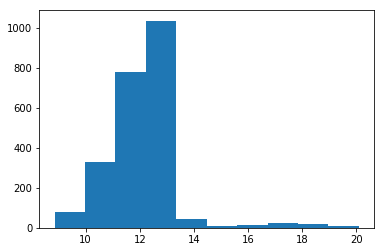

In [11]:
plt.hist(data['G'])

(array([  81.,  328.,  777., 1035.,   42.,    7.,   13.,   22.,   17.,
           9.]),
 array([-2.49351283, -1.6417387 , -0.78996456,  0.06180958,  0.91358372,
         1.76535785,  2.61713199,  3.46890613,  4.32068027,  5.1724544 ,
         6.02422854]),
 <a list of 10 Patch objects>)

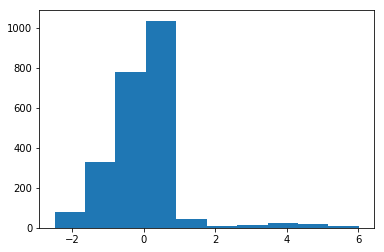

In [12]:
plt.hist((data['G']-np.mean(data['G']))/np.std(data['G']))

(array([  81.,  328.,  777., 1035.,   42.,    7.,   13.,   22.,   17.,
           9.]),
 array([-2.49351283, -1.6417387 , -0.78996456,  0.06180958,  0.91358372,
         1.76535785,  2.61713199,  3.46890613,  4.32068027,  5.1724544 ,
         6.02422854]),
 <a list of 10 Patch objects>)

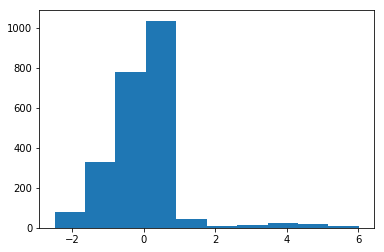

In [13]:
plt.hist(data['G_NORM'])

In [18]:
data.columns

Index(['Unnamed: 0', 'APOGEE_ID', 'source_id', 'LOGG', 'TEFF', 'ALPHA_M',
       'M_H', 'C_FE', 'N_FE', 'G', 'BP', 'RP', 'J', 'H', 'K', 'LOGG_ERR',
       'TEFF_ERR', 'ALPHA_M_ERR', 'M_H_ERR', 'C_FE_ERR', 'N_FE_ERR', 'G_ERR',
       'BP_ERR', 'RP_ERR', 'J_ERR', 'H_ERR', 'K_ERR', 'age', 'age_68u',
       'age_68l', 'ageErr', 'logAge', 'logAgeErr', 'distKpc', 'distKpc_68u',
       'distKpc_68l', 'distErrKpc', 'logDistKpc', 'logDistKpcErr', 'LOGG_NORM',
       'LOGG_ERR_NORM', 'TEFF_NORM', 'TEFF_ERR_NORM', 'ALPHA_M_NORM',
       'ALPHA_M_ERR_NORM', 'M_H_NORM', 'M_H_ERR_NORM', 'C_FE_NORM',
       'C_FE_ERR_NORM', 'N_FE_NORM', 'N_FE_ERR_NORM', 'G_NORM', 'G_ERR_NORM',
       'BP_NORM', 'BP_ERR_NORM', 'RP_NORM', 'RP_ERR_NORM', 'J_NORM',
       'J_ERR_NORM', 'H_NORM', 'H_ERR_NORM', 'K_NORM', 'K_ERR_NORM'],
      dtype='object')

In [19]:
len(data)

2331